## Identifying Landslide Hotspots Using Unsupervised Clustering: A Case Study
The primary goal of the project is to analyze and cluster the topographic data to understand patterns and potential risk areas for landslides. The use of Unsupervised machine learning approaches helps to group regions with similar characteristics, which can be related to landslide occurrences. By understanding these clusters, one can potentially identify areas with higher risks of landslides and analyze the impact of different triggers and landslide types.

By employing unsupervised machine learning algorithms, the aim is to discover hidden patterns and relationships within topographic data that could potentially indicate areas prone to landslides.

Specific Objectives:

Identify homogeneous regions: Group areas with similar topographic characteristics (e.g., latitude, longitude, trigger) to uncover potential landslide-susceptible zones.

Detect anomalies: Identify topographic outliers or anomalies that might correspond to areas with unique geological conditions or landslide hotspots. Feature extraction: Extract meaningful features from the topographic data that can be used as input for subsequent supervised learning models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.plotly as py
%matplotlib inline

import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('catalog.csv')
data

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...


## DATA CLEANING AND PREPROCESSING

In [3]:
data.shape

(1693, 23)

In [4]:
data.describe()

,id,population,distance,latitude,longitude,injuries,fatalities
count,1693.000000,1.693000e+03,1692.000000,1692.000000,1692.000000,515.000000,1446.000000
mean,4145.027761,9.345940e+04,7.822695,27.715661,-86.883660,0.526214,1.459198
std,2236.741960,5.226016e+05,9.358256,14.206341,14.332811,3.427514,9.184653
min,34.000000,0.000000e+00,0.000030,-10.125800,-117.309200,0.000000,0.000000
25%,2330.000000,2.080000e+03,1.936360,14.085650,-92.646625,0.000000,0.000000
50%,4087.000000,5.785000e+03,4.538635,35.613200,-83.653000,0.000000,0.000000
75%,6098.000000,1.886700e+04,9.873865,39.546400,-78.851325,0.000000,0.000000
max,7541.000000,1.229419e+07,74.460970,45.425700,-45.601000,45.000000,280.000000


In [5]:
data.isnull().sum()

id                         0
date                       3
time                    1064
continent_code          1529
country_name               0
country_code               0
state/province             1
population                 0
city/town                  4
distance                   1
location_description    1142
latitude                   1
longitude                  1
geolocation                1
hazard_type                0
landslide_type             1
landslide_size             1
trigger                    2
storm_name              1561
injuries                1178
fatalities               247
source_name              821
source_link              100
dtype: int64

In [6]:
del data['time']
del data['continent_code']
del data['location_description']
del data['storm_name']
del data['injuries']
del data['fatalities']
del data['source_link']
del data['source_name']
del data['date']

In [7]:
data.isnull().sum()

id                0
country_name      0
country_code      0
state/province    1
population        0
city/town         4
distance          1
latitude          1
longitude         1
geolocation       1
hazard_type       0
landslide_type    1
landslide_size    1
trigger           2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   country_name    1693 non-null   object 
 2   country_code    1693 non-null   object 
 3   state/province  1692 non-null   object 
 4   population      1693 non-null   int64  
 5   city/town       1689 non-null   object 
 6   distance        1692 non-null   float64
 7   latitude        1692 non-null   float64
 8   longitude       1692 non-null   float64
 9   geolocation     1692 non-null   object 
 10  hazard_type     1693 non-null   object 
 11  landslide_type  1692 non-null   object 
 12  landslide_size  1692 non-null   object 
 13  trigger         1691 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 185.3+ KB


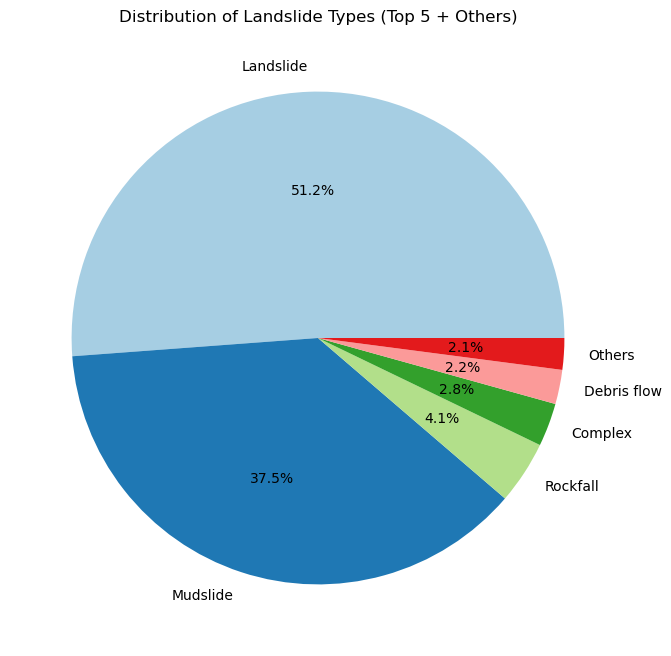

In [9]:
# Count the occurrences of each landslide type
landslide_counts = data['landslide_type'].value_counts()

# Get the top 10 types
top_5 = landslide_counts.nlargest(5)

# Sum the rest as 'Others'
others = pd.Series({'Others': landslide_counts.iloc[5:].sum()})

# Combine top 10 and others
plot_data = pd.concat([top_5, others])

# Plot a pie chart
plt.figure(figsize=(12, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Landslide Types (Top 5 + Others)')
plt.show()

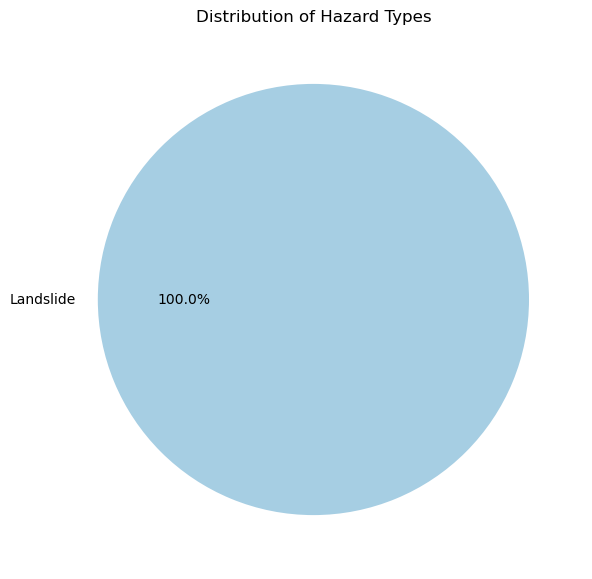

In [10]:
# Count the occurrences of each hazard type
hazard_counts = data['hazard_type'].value_counts()


# Plot a pie chart
plt.figure(figsize=(10, 7))
plt.pie(hazard_counts, labels=hazard_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Hazard Types')
plt.show()

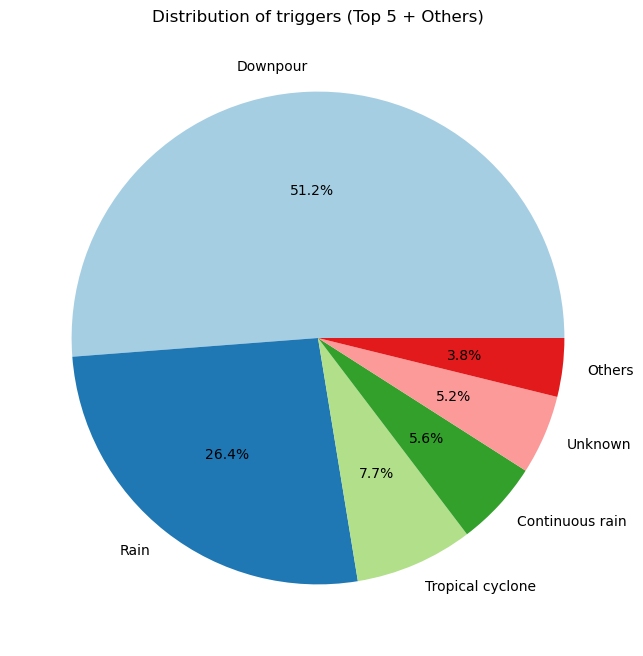

In [11]:
# Count the occurrences of each landslide type
trigger_counts = data['trigger'].value_counts()

# Get the top 10 types
top_5 = trigger_counts.nlargest(5)

# Sum the rest as 'Others'
others = pd.Series({'Others': trigger_counts.iloc[5:].sum()})

# Combine top 10 and others
plot_data = pd.concat([top_5, others])

# Plot a pie chart
plt.figure(figsize=(12, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of triggers (Top 5 + Others)')
plt.show()

In [12]:
data['landslide_size'].value_counts()

Medium        965
Small         636
Large          68
Very_large     15
medium          3
small           3
large           2
Name: landslide_size, dtype: int64

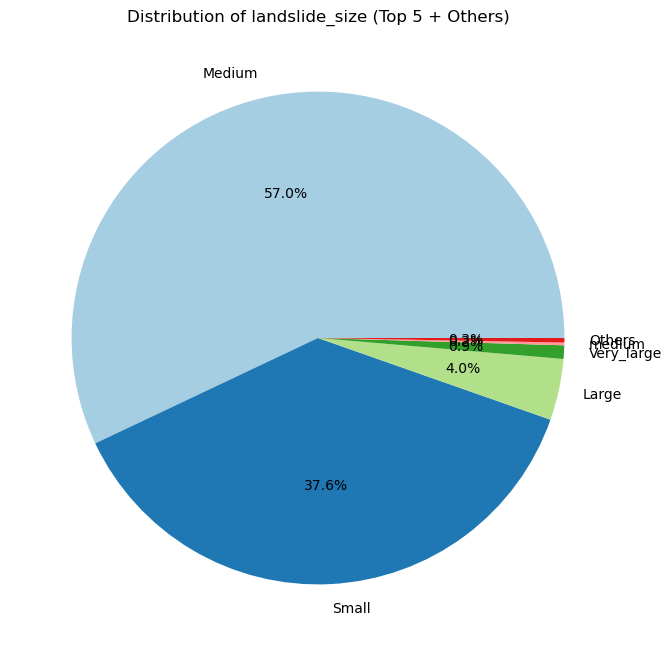

In [13]:
# Count the occurrences of each landslide type
landslide_size_counts = data['landslide_size'].value_counts()

# Get the top 10 types
top_5 = landslide_size_counts.nlargest(5)

# Sum the rest as 'Others'
others = pd.Series({'Others': landslide_size_counts.iloc[5:].sum()})

# Combine top 10 and others
plot_data = pd.concat([top_5, others])

# Plot a pie chart
plt.figure(figsize=(12, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of landslide_size (Top 5 + Others)')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [15]:
# Encode categorical variables
label_encoders = {}
for col in ['hazard_type', 'landslide_type', 'trigger', 'country_name', 'country_code', 'state/province', 'city/town', 'landslide_size']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [16]:
data

,id,country_name,country_code,state/province,population,city/town,distance,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger
0,34,26,24,219,16000,186,3.40765,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",0,4,2,9
1,42,26,24,130,17288,627,3.33522,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",0,4,2,9
2,56,26,24,139,15930,995,2.91977,40.4377,-79.9160,"(40.4377, -79.915999999999997)",0,4,2,9
3,59,4,4,151,42786,203,2.98682,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",0,7,2,9
4,61,26,24,87,6903,693,5.66542,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",0,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,26,24,124,1646,943,7.80866,35.2219,-82.3226,"(35.221899999999998, -82.322599999999994)",0,8,2,16
1689,7537,26,24,220,51400,180,6.84721,38.3987,-81.5848,"(38.398699999999998, -81.584800000000001)",0,5,2,12
1690,7539,26,24,220,2406,975,14.19735,37.4096,-81.4268,"(37.409599999999998, -81.4268)",0,4,2,9
1691,7540,26,24,220,1048,52,12.00678,37.5011,-81.1093,"(37.501100000000001, -81.109300000000005)",0,8,2,12


### Modelling

In [17]:
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

In [18]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = [ 
                       'latitude', 'longitude' 
                      ]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [19]:
# Check for missing, infinite, or very large values
print("Missing values:\n", data[numerical_features].isna().sum())
print("\nInfinite values:\n", np.isinf(data[numerical_features]).sum())
print("\nDescriptive statistics:\n", data[numerical_features].describe())

Missing values:
 latitude     1
longitude    1
dtype: int64

Infinite values:
 latitude     0
longitude    0
dtype: int64

Descriptive statistics:
            latitude     longitude
count  1.692000e+03  1.692000e+03
mean  -2.548526e-16 -1.269014e-16
std    1.000296e+00  1.000296e+00
min   -2.664490e+00 -2.123417e+00
25%   -9.597151e-01 -4.022009e-01
50%    5.560808e-01  2.254697e-01
75%    8.330250e-01  5.605815e-01
max    1.246998e+00  2.881142e+00


In [20]:
# Replace missing and infinite values with the mean of each column
data[numerical_features] = data[numerical_features].replace([np.inf, -np.inf], np.nan)
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

In [21]:
# Scale the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [22]:
# Fit K-Means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[numerical_features])

In [23]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']))

<function matplotlib.pyplot.show(close=None, block=None)>

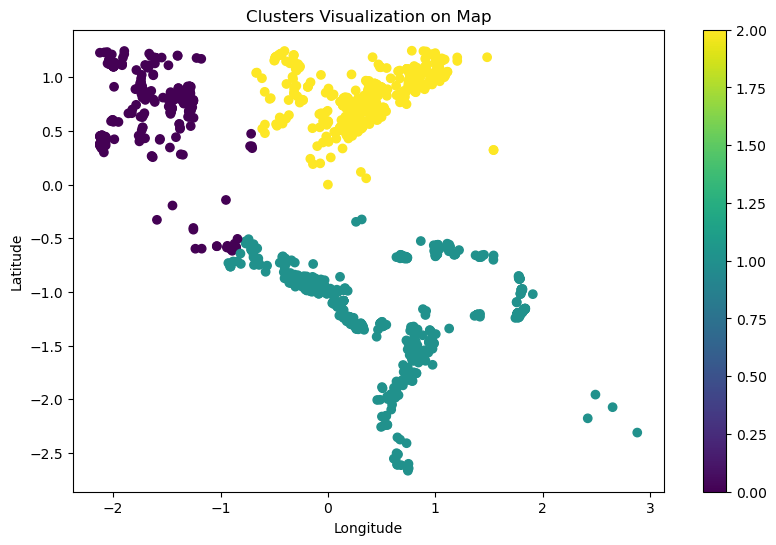

In [24]:
# Plot the clusters on a map
gdf.plot(column='Cluster', cmap='viridis', legend=True, figsize=(10, 6))
plt.title('Clusters Visualization on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show

### Interpretation:
Cluster Separation:
The data points are grouped into three distinct clusters, shown in different colors. This suggests that the clustering algorithm has successfully identified three distinct groups in the data based on longitude and latitude. Geographical Spread:

The clusters are spread out geographically, indicating that certain locations have distinct characteristics that differentiate them from others. For instance, one cluster is concentrated around longitudes -2 to -1 and latitudes 0.5 to 1, another around longitudes 0 to 2 and latitudes 0 to 1, and the third one is more spread out across the rest of the map. Cluster Centers:

The plot doesn't show cluster centers, but you can infer that the centroids of the clusters would be somewhere around the densest concentrations of points within each color group.

In [25]:
# Calculate cluster centers
centers = kmeans.cluster_centers_
print("Cluster centers:\n", centers)

Cluster centers:
 [[ 0.69130559 -1.63616082]
 [-1.16044035  0.54028376]
 [ 0.79590293  0.31592609]]


In [26]:
# Calculate silhouette score for validation
from sklearn.metrics import silhouette_score
score = silhouette_score(data[numerical_features], data['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.6371744704484731


In [27]:
# Analyze each cluster
for i in range(3):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i} mean values:\n", cluster_data[numerical_features].mean())
    print(f"Cluster {i} size: {len(cluster_data)}")

Cluster 0 mean values:
 latitude     0.691306
longitude   -1.636161
dtype: float64
Cluster 0 size: 351
Cluster 1 mean values:
 latitude    -1.160440
longitude    0.540284
dtype: float64
Cluster 1 size: 670
Cluster 2 mean values:
 latitude     0.795903
longitude    0.315926
dtype: float64
Cluster 2 size: 672


In [28]:
kmeans.inertia_

688.049139291217

### To further understand the causes of landslide 

In [29]:
# Combine these features into a single DataFrame for clustering
features_for_clustering = ['hazard_type', 'landslide_type', 'landslide_size', 'trigger', 'latitude', 'longitude']
X = data[features_for_clustering]

In [30]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Check for missing, infinite, or very large values
print("Missing values:\n", pd.DataFrame(X_scaled).isna().sum())
print("\nInfinite values:\n", np.isinf(X_scaled).sum())
print("\nDescriptive statistics:\n", pd.DataFrame(X_scaled).describe())

Missing values:
 0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

Infinite values:
 0

Descriptive statistics:
             0             1             2             3             4  \
count  1693.0  1.693000e+03  1.693000e+03  1.693000e+03  1.693000e+03   
mean      0.0  3.473496e-15 -3.057212e-16 -6.500018e-16 -4.000213e-17   
std       0.0  1.000295e+00  1.000295e+00  1.000295e+00  1.000295e+00   
min       0.0 -3.271272e+00 -2.138295e+00 -1.588159e+00 -2.665277e+00   
25%       0.0 -3.265619e-01 -5.845897e-01 -7.605109e-01 -9.599388e-01   
50%       0.0 -3.265619e-01 -5.845897e-01 -7.605109e-01  5.559634e-01   
75%       0.0  4.096156e-01  9.691157e-01  8.947858e-01  8.332359e-01   
max       0.0  7.035212e+00  8.737643e+00  2.825965e+00  1.247366e+00   

                  5  
count  1.693000e+03  
mean   5.639644e-18  
std    1.000295e+00  
min   -2.124044e+00  
25%   -4.017804e-01  
50%    2.247475e-01  
75%    5.591642e-01  
max    2.881993e+00  


In [32]:
# Fit K-Means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [33]:
# Calculate silhouette score for validation
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, data['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.26247790748415273


In [34]:
# Davies-Bouldin Index
from sklearn.metrics import silhouette_score, davies_bouldin_score
db_index = davies_bouldin_score(X_scaled, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.5309346044732184


In [35]:
from sklearn.metrics import calinski_harabasz_score
# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_scaled, data['Cluster'])
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 484.6094944748621


In [36]:
# Analyze each cluster
for i in range(3):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i} mean values:\n", cluster_data[features_for_clustering].mean())
    print(f"Cluster {i} size: {len(cluster_data)}")

Cluster 0 mean values:
 hazard_type       0.000000
landslide_type    4.797131
landslide_size    1.553279
trigger           9.899590
latitude          0.483092
longitude        -0.222059
dtype: float64
Cluster 0 size: 488
Cluster 1 mean values:
 hazard_type       0.000000
landslide_type    4.493590
landslide_size    1.576923
trigger           2.834936
latitude          0.738382
longitude        -0.436081
dtype: float64
Cluster 1 size: 624
Cluster 2 mean values:
 hazard_type       0.000000
landslide_type    4.092943
landslide_size    1.012048
trigger           5.414802
latitude         -1.198794
longitude         0.654870
dtype: float64
Cluster 2 size: 581


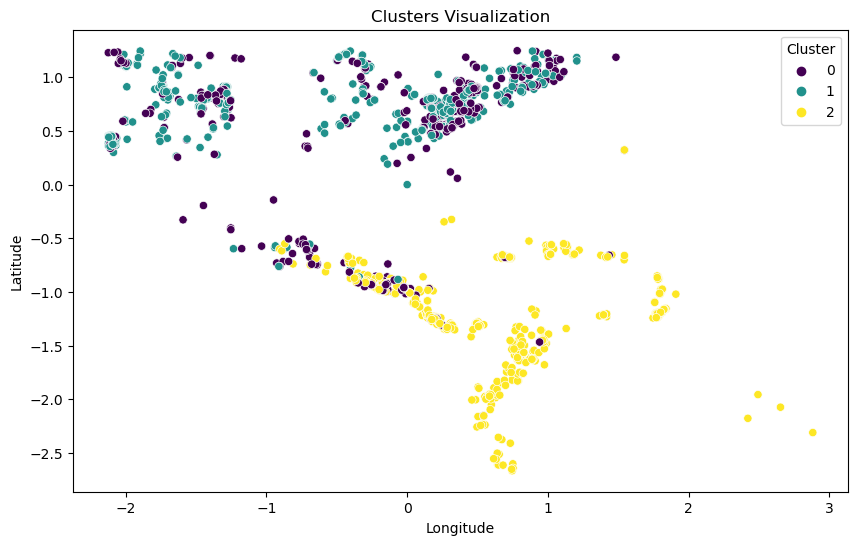

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters with scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['longitude'], y=data['latitude'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


### Analysis of the Clusters
Cluster 0 (Purple):

This cluster seems to be spread across the entire geographical region.
It might represent landslide events that have a common hazard type, landslide type, size, or trigger.

Cluster 1 (Teal):

This cluster is primarily located in the northern part of the plot.
The events in this cluster may share certain geographical or feature similarities, distinguishing them from the other clusters.

Cluster 2 (Yellow):

This cluster is predominantly located in the southern part of the plot.
The clustering suggests that these events are more similar to each other compared to events in clusters 0 and 1.

### Detailed cluster Analysis

In [38]:
# Calculate mean values for each cluster
for i in range(3):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i} mean values:\n", cluster_data[['hazard_type', 'landslide_type', 'landslide_size', 'trigger', 'latitude', 'longitude']].mean())
    print(f"Cluster {i} size: {len(cluster_data)}\n")

Cluster 0 mean values:
 hazard_type       0.000000
landslide_type    4.797131
landslide_size    1.553279
trigger           9.899590
latitude          0.483092
longitude        -0.222059
dtype: float64
Cluster 0 size: 488

Cluster 1 mean values:
 hazard_type       0.000000
landslide_type    4.493590
landslide_size    1.576923
trigger           2.834936
latitude          0.738382
longitude        -0.436081
dtype: float64
Cluster 1 size: 624

Cluster 2 mean values:
 hazard_type       0.000000
landslide_type    4.092943
landslide_size    1.012048
trigger           5.414802
latitude         -1.198794
longitude         0.654870
dtype: float64
Cluster 2 size: 581



In [39]:
# Visualize the distribution of categorical features within each cluster
categorical_features = ['hazard_type', 'landslide_type', 'landslide_size', 'trigger']

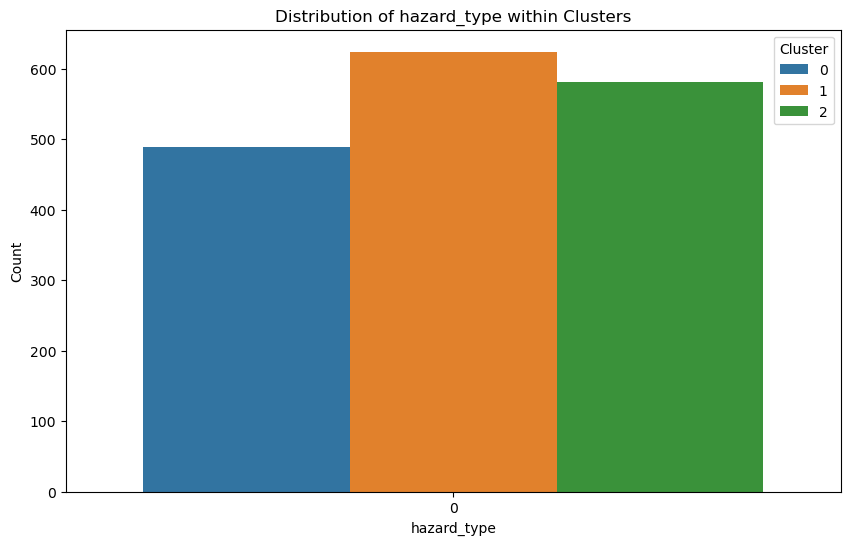

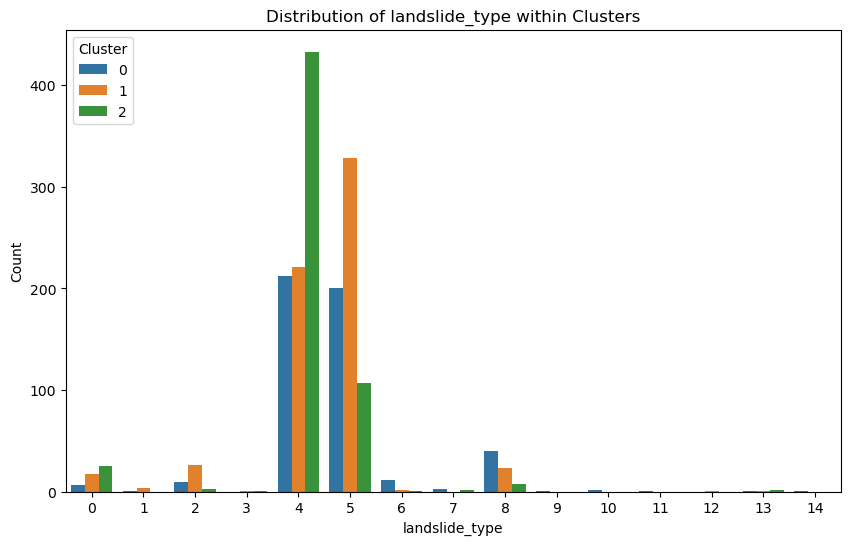

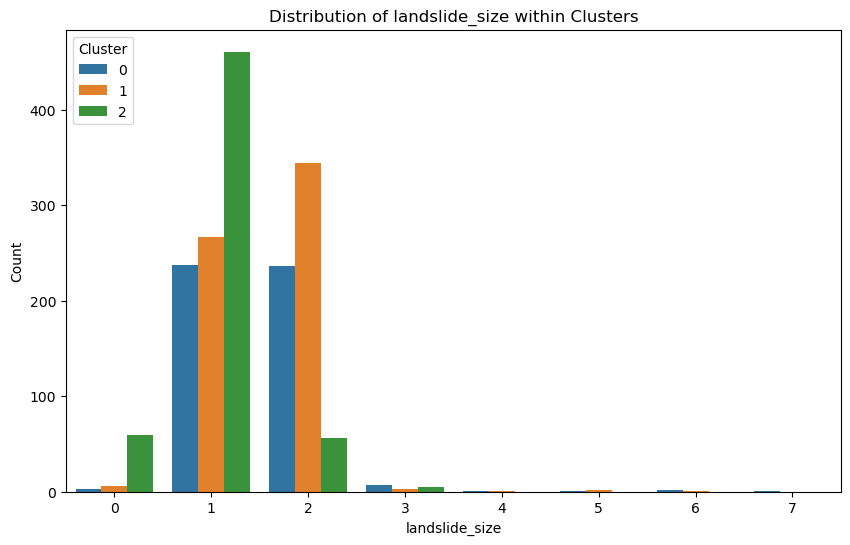

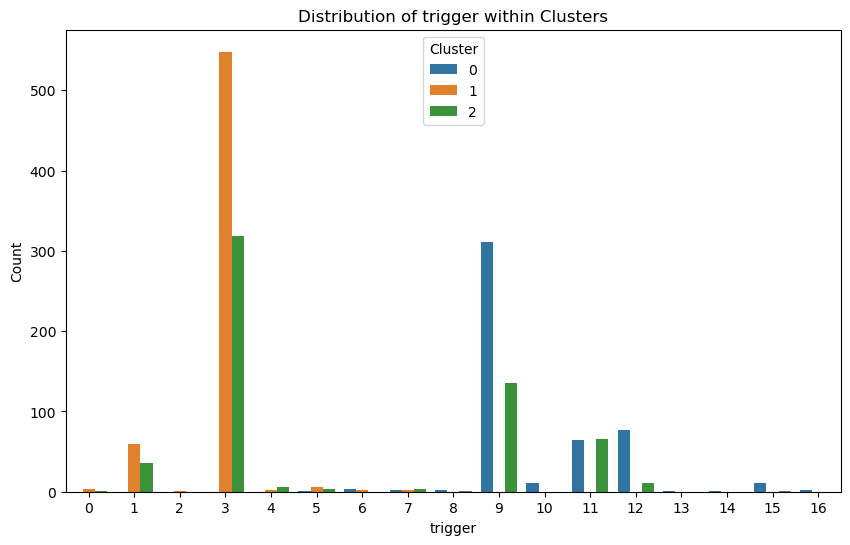

In [40]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='Cluster')
    plt.title(f'Distribution of {feature} within Clusters')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Cluster')
    plt.show()

1. Distribution of hazard_type within Clusters

Explanation:

This bar plot shows the count of different hazard_type values within each cluster.
The hazard_type feature seems to have the same value (0) for all data points across all clusters.
This implies that hazard_type might not be a differentiating feature among the clusters, as its distribution is uniform.

2. Distribution of landslide_type within Clusters

Explanation:

This bar plot shows the count of different landslide_type values within each cluster.
The plot indicates variation in the distribution of landslide_type across clusters.
For example, landslide_type 4 is dominant in Cluster 2, while landslide_type 5 is more prevalent in Cluster 1.
This suggests that landslide_type might be an important feature in distinguishing between clusters.

3. Distribution of landslide_size within Clusters

Explanation:

This bar plot shows the count of different landslide_size values within each cluster.
There is a noticeable variation in the distribution of landslide_size across clusters.
For instance, Cluster 2 has a high count of landslide_size 1, whereas Cluster 1 has more instances of landslide_size 2.
This suggests that landslide_size is a relevant feature for clustering.

4. Distribution of trigger within Clusters

Explanation:

This bar plot shows the count of different trigger values within each cluster.
There is significant variation in the distribution of trigger values across clusters.
For example, trigger value 3 is dominant in Cluster 1, while trigger value 9 is prevalent in Cluster 0.
This indicates that trigger is an important feature for differentiating the clusters.

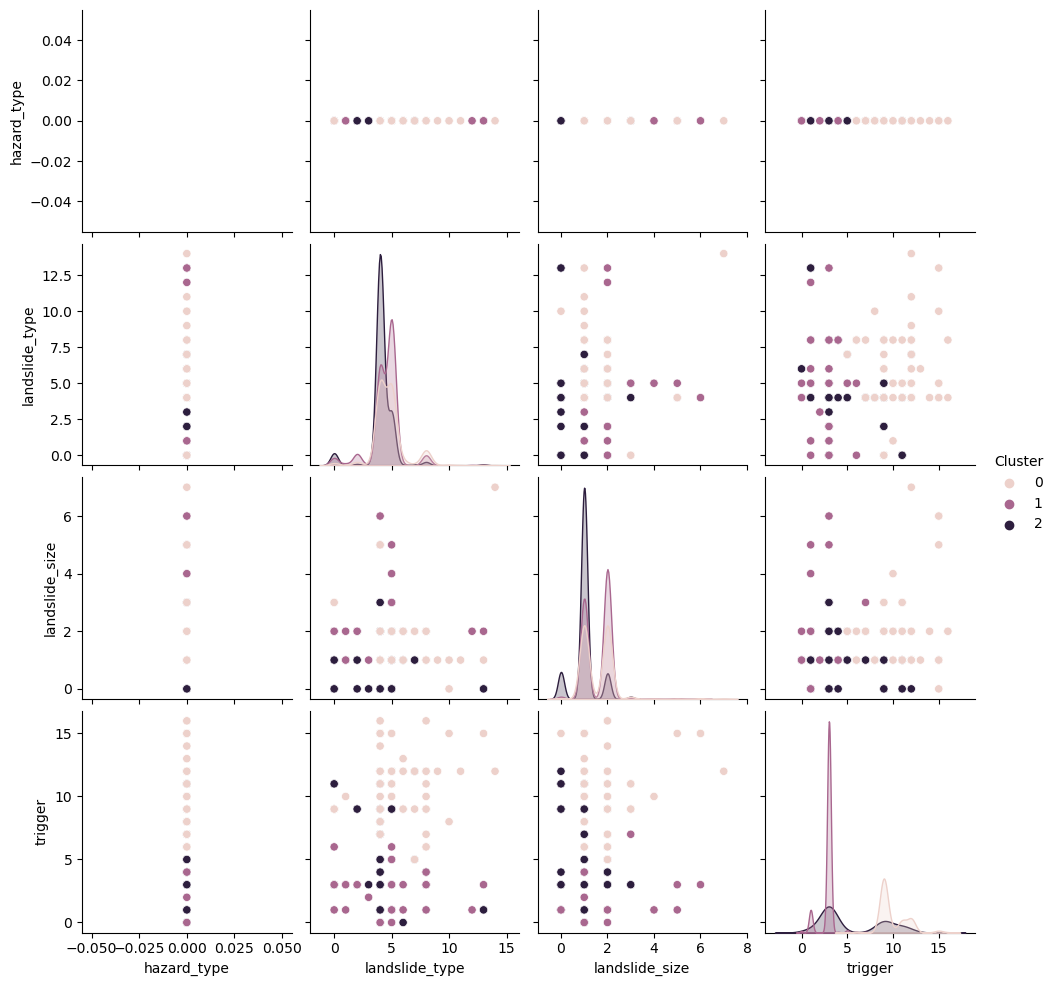

In [41]:
# Pair plot for visualizing feature distributions within clusters
sns.pairplot(data, hue='Cluster', vars=['hazard_type', 'landslide_type', 'landslide_size', 'trigger'])
plt.show()

The diagonal plots represent the distribution (density plots) of each feature for the three clusters.

hazard_type:

The distributions of hazard_type for all clusters are almost the same, indicating no variation in hazard_type among the clusters.
landslide_type:

Clusters 0 and 1 show more variation in landslide_type compared to Cluster 2.
Cluster 1 has a higher density around specific values.
landslide_size:

Cluster 2 shows higher density at specific sizes compared to Clusters 0 and 1.
trigger:

There are notable peaks in the density plots for Clusters 1 and 2, indicating specific triggers are more common in these clusters.


### Off-Diagonal Plots
The off-diagonal plots represent pairwise relationships between the features, with each point colored by the cluster it belongs to.

hazard_type vs. Other Features:

Since hazard_type shows no variation, the plots involving hazard_type appear as straight lines.
landslide_type vs. landslide_size:

There are distinct clusters, with Cluster 2 showing higher concentration at specific combinations of landslide_type and landslide_size.
landslide_type vs. trigger:

There is a spread of trigger values across the landslide_type with some clustering observed.
landslide_size vs. trigger:

Similar to above, certain clusters show specific combinations of landslide_size and trigger.


### Observations
Cluster 2 is distinct in landslide_size and trigger, showing higher concentrations at certain values.
Cluster 0 and Cluster 1 show a wider spread of landslide_type and trigger.
Insights
This pair plot helps in visualizing the distribution and relationships of the categorical features within the clusters. By examining these relationships, you can:

Identify which features contribute more to cluster differentiation.
Understand the characteristics of each cluster in terms of landslide_type, landslide_size, and trigger.

In [42]:
# Ensure 'Cluster' column is not included in the heatmap data
cluster_means = data.groupby('Cluster').mean()

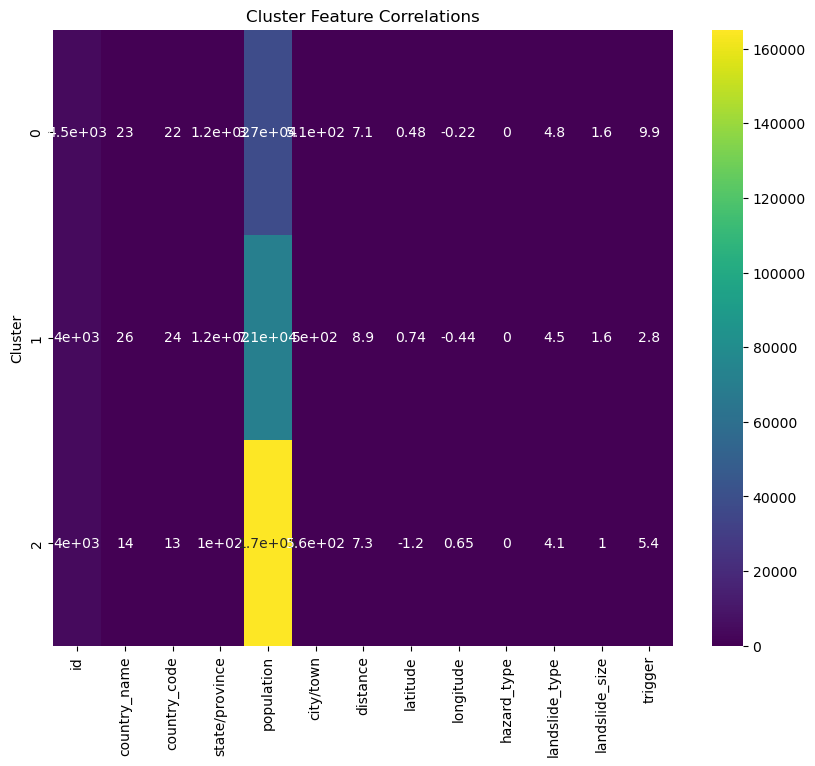

In [43]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Cluster Feature Correlations')
plt.show()

### Predictive Modeling
To develop a predictive model, we will use algorithms like Random Forest.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [45]:
# Prepare the data for modeling
X = data[numerical_features]
y = data['Cluster']

In [46]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

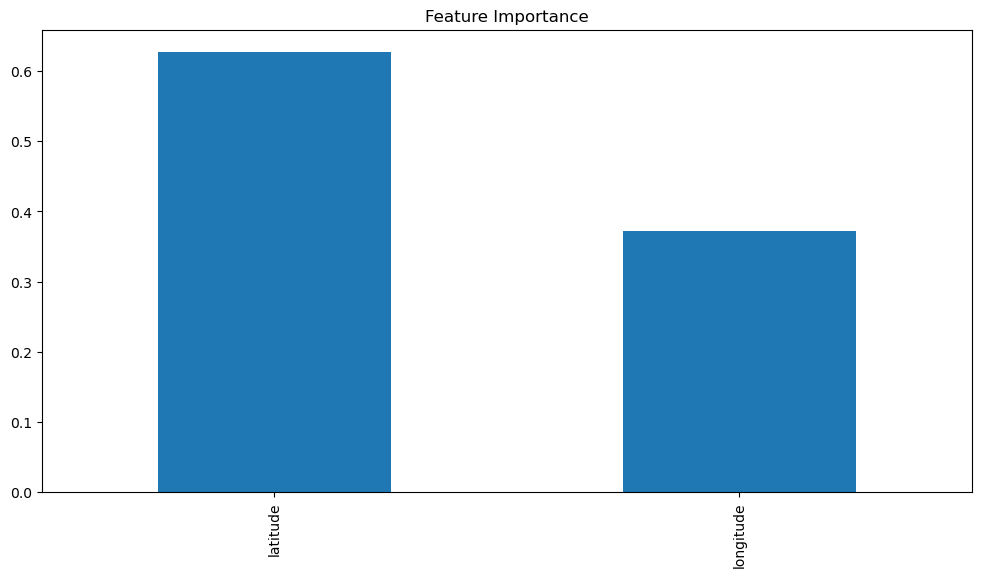

In [47]:
# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()

Feature Importance using Random Forest
The purpose of this part is to determine which features are most influential in distinguishing the clusters. This helps to understand which variables contribute most to the clustering.

In [48]:
# Adjust clustering (e.g., changing number of clusters)
from sklearn.cluster import KMeans

In [49]:
# Fit K-Means with a different number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

In [50]:
# Recalculate cluster centers and silhouette score
centers = kmeans.cluster_centers_
score = silhouette_score(X, data['Cluster'])
print("Cluster centers:\n", centers)
print("Silhouette Score:", score)

Cluster centers:
 [[ 0.74807604 -1.66693713]
 [-1.29904444  1.1045933 ]
 [ 0.79590293  0.31592609]
 [-0.98208689 -0.14573657]]
Silhouette Score: 0.631400320904533


## Advanced Clustering Techniques: DBSCAN and Hierarchical Clustering
In addition to K-Means clustering, experimenting with other clustering techniques like DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and hierarchical clustering can provide different perspectives and insights into your data. Each method has its own strengths and can be suitable for different types of data distributions.

### 1. DBSCAN Clustering
DBSCAN is a density-based clustering method that can find arbitrarily shaped clusters and is robust to noise. It works well when clusters have varying densities.

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [52]:
# Standardize features before applying DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X_scaled)

In [54]:
# Add the cluster labels to the data
data['Cluster_DBSCAN'] = clusters_dbscan

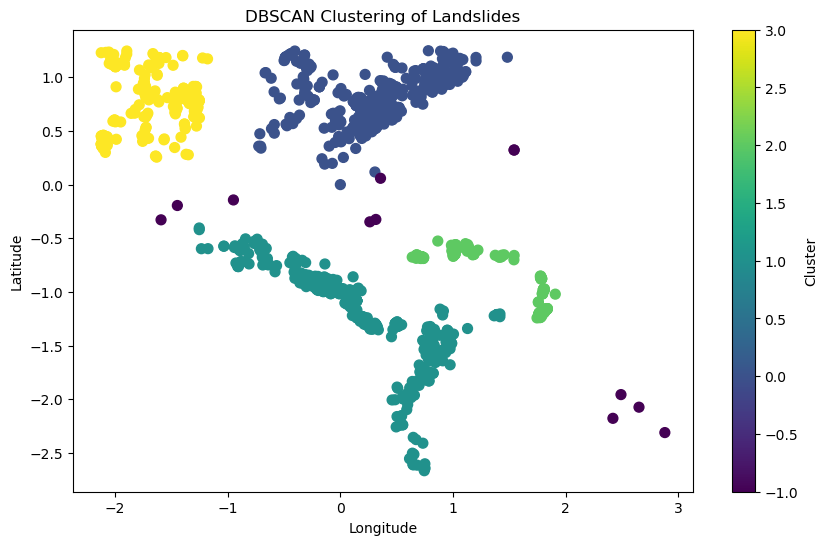

In [55]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster_DBSCAN'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Landslides')
plt.show()

Different colors represent different clusters. Each point's color corresponds to the cluster it belongs to.
* The color bar on the right shows the cluster labels ranging from -1 to 3.
* Cluster -1 (Purple): These points are identified as noise. They do not belong to any cluster.
* Cluster 0 (Teal), Cluster 1 (Yellow), Cluster 2 (Dark Blue), and Cluster 3 (Green): These points form four distinct clusters.

#### Evaluation

In [56]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Remove noise points for silhouette score
mask = data['Cluster_DBSCAN'] != -1
X = data[['longitude', 'latitude']][mask]
labels = data['Cluster_DBSCAN'][mask]

In [57]:
# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.6103083734368363


In [58]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.6264221291822846


In [59]:
from sklearn.metrics import calinski_harabasz_score
# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 3471.7177690193307


In [60]:
# Number of noise points
n_noise = list(data['Cluster_DBSCAN']).count(-1)
print(f'Number of noise points: {n_noise}')

Number of noise points: 12


### 2. Hierarchical Clustering
Hierarchical clustering creates a tree of clusters (dendrogram). Agglomerative clustering, a type of hierarchical clustering, is bottom-up, starting with individual points and merging the closest clusters iteratively.

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [62]:
# Perform hierarchical/agglomerative clustering
linked = linkage(X_scaled, method='ward')

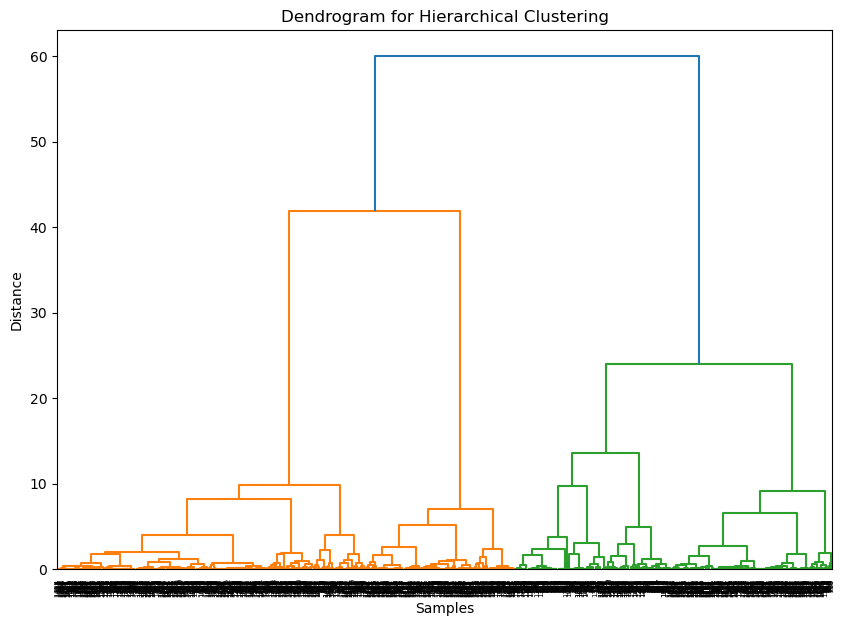

In [63]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [64]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Assuming 3 clusters
clusters_agg = agg_clustering.fit_predict(X_scaled)

In [65]:
# Add the cluster labels to the data
data['Cluster_Agglomerative'] = clusters_agg

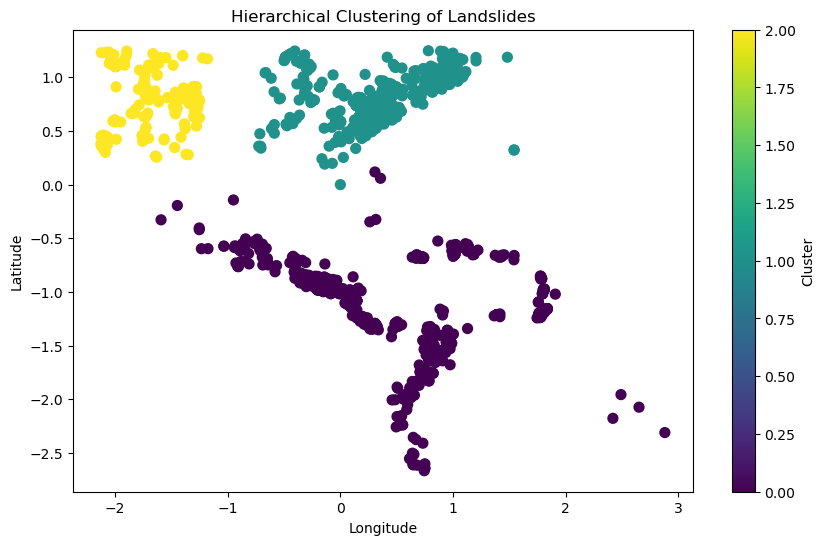

In [66]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster_Agglomerative'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hierarchical Clustering of Landslides')
plt.show()

Distinct Clusters: The plot showcases three primary clusters, visually distinguishable by their color:

A large, elongated cluster in the center, colored in shades of purple.
A smaller, circular cluster towards the top-right, colored in shades of green.
A compact cluster at the bottom-left, colored in shades of yellow.


Cluster Formation: The clustering algorithm likely grouped landslides based on their geographical closeness. Landslides within a cluster are spatially proximate, suggesting potential common underlying factors influencing their occurrence in those specific regions.

In [67]:
# Calculate silhouette score for validation
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, data['Cluster_Agglomerative'])
print("Silhouette Score:", score)

Silhouette Score: 0.6352398188724149


In [68]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, data['Cluster_Agglomerative'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.5135129090035964


In [69]:
from sklearn.metrics import calinski_harabasz_score
# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_scaled, data['Cluster_Agglomerative'])
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 3191.3431386956845


## Spectral Clustering for Landslide Analysis

In [70]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

In [71]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Create a Spectral Clustering model
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')

In [73]:
# Fit the model to the data
spectral_labels = spectral.fit_predict(X_scaled)

C:\New folder\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


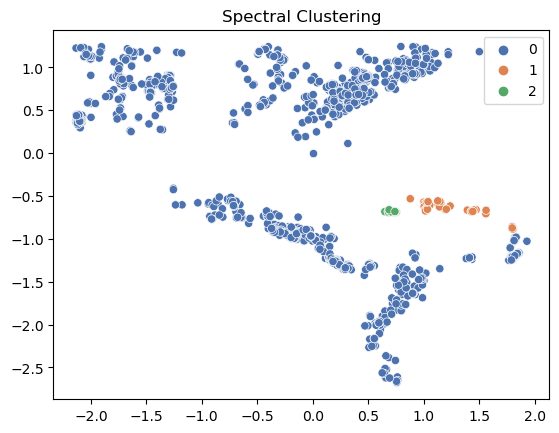

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=spectral_labels, palette='deep')
plt.title('Spectral Clustering')
plt.show()

* Each cluster could represent a region with specific landslide characteristics. For example, one cluster might correspond to landslides occurring in mountainous areas with steep slopes, while another cluster could represent landslides in flatter regions with different geological conditions.

* The degree of overlap between clusters might indicate areas of transition or mixed landslide characteristics. Further analysis of these regions could provide valuable insights into the factors influencing landslide occurrence.

In [75]:
# Calculate silhouette score for validation
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, spectral_labels)
print("Silhouette Score:", score)

Silhouette Score: -0.056695156678275266


In [76]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, spectral_labels)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.1798778812267334


In [77]:
from sklearn.metrics import calinski_harabasz_score
# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_scaled, spectral_labels)
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 44.87817437647632


* Silhouette Coefficient (0.1804): This value is relatively low, suggesting that the average sample is not clearly separated from its neighbors. There might be significant overlap between clusters or suboptimal cluster assignments.
* Bouldin Index (1.2538): This value is relatively high, indicating a moderate level of similarity between clusters. This suggests that the clusters might not be well-separated.
* Calinski-Harabasz Index (254.7960): While this value is positive, it's relatively low compared to what might be expected for well-separated clusters.

The spectral clustering results, as indicated by the evaluation metrics, suggest that it might not be the optimal algorithm for this specific dataset.


## Mean Shift Clustering for Landslide Analysis
Mean Shift is a density-based clustering algorithm that doesn't require specifying the number of clusters beforehand. It's particularly useful for discovering clusters of arbitrary shape and size.

In [78]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

In [79]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

In [81]:
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift_labels = mean_shift.fit_predict(X_scaled)


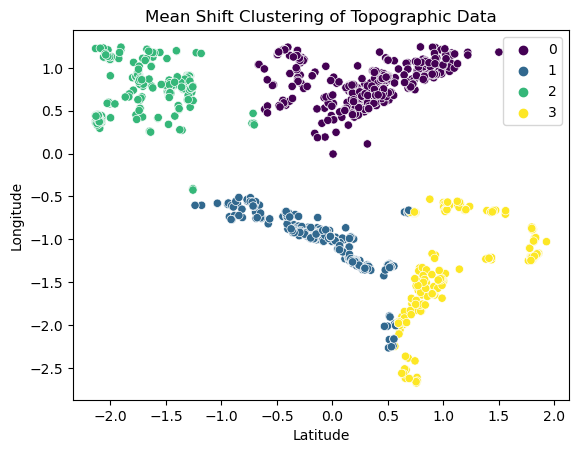

In [82]:
# Visualize the clustering (2D visualization using first two features)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=mean_shift_labels, palette='viridis')
plt.title('Mean Shift Clustering of Topographic Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

* Identifying Potential Landslide-Prone Areas: By examining the spatial distribution of the clusters, it is possible to identify regions that are more susceptible to landslides. Clusters with a higher density of data points might indicate areas with similar topographic conditions that are conducive to landslide occurrence.
* Understanding Landslide Patterns: Analyzing the characteristics of data points within each cluster can provide insights into the factors influencing landslide susceptibility. For example, one cluster might represent areas with steep slopes, while another might correspond to regions with specific soil types or land cover.
* Informing Prevention Measures: The identified clusters can be used to prioritize landslide prevention and mitigation efforts. Areas with a high density of landslide occurrences (represented by larger clusters) might require more intensive monitoring and protective measures.

In [83]:
# Calculate silhouette score for validation
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, mean_shift_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.633127606136635


In [84]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, mean_shift_labels)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.6032175468393344


In [85]:
from sklearn.metrics import calinski_harabasz_score
# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_scaled, mean_shift_labels)
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 4121.750037929624
